- 마을버스 제외
- 배차시간 1단계 : 제외 / 2단계 고려

In [404]:
import pandas as pd

In [405]:
busstop_raw_data = pd.read_excel('./data/busan_busstop_info.xlsx',
                                 header=4)

In [406]:
busstop_raw_data.head()

,BUSLINENUM,ORD,NAME,SIGUNNAME,GUNAME,DONGNAME,X,Y,UNIQUEID,BUSSTOPID
0,1,1,기점,부산광역시,수영구,민락동,129.127115,35.159515,NaN,21140601002
1,1,2,MBC방송국,부산광역시,수영구,민락동,129.126416,35.159658,14034.0,21140601013
2,1,3,민락동골목시장,부산광역시,수영구,민락동,129.123045,35.158969,14037.0,21140601006
3,1,4,광안농협앞,부산광역시,수영구,광안2동,129.120022,35.157650,14067.0,21140571002
4,1,5,광안리해수욕장,부산광역시,수영구,광안2동,129.116613,35.155443,14065.0,21140571001


In [407]:
busstop_data = busstop_raw_data.iloc[:, [0, 2, 3, 4, 6, 7, 9]]
busstop_data.head()

,BUSLINENUM,NAME,SIGUNNAME,GUNAME,X,Y,BUSSTOPID
0,1,기점,부산광역시,수영구,129.127115,35.159515,21140601002
1,1,MBC방송국,부산광역시,수영구,129.126416,35.159658,21140601013
2,1,민락동골목시장,부산광역시,수영구,129.123045,35.158969,21140601006
3,1,광안농협앞,부산광역시,수영구,129.120022,35.157650,21140571002
4,1,광안리해수욕장,부산광역시,수영구,129.116613,35.155443,21140571001


In [408]:
# 부산광역시 시내버스 정류소만 추출(경상남도 제외)
busstop_busan = busstop_data[busstop_data['SIGUNNAME']=='부산광역시']
busstop_busan.head()

,BUSLINENUM,NAME,SIGUNNAME,GUNAME,X,Y,BUSSTOPID
0,1,기점,부산광역시,수영구,129.127115,35.159515,21140601002
1,1,MBC방송국,부산광역시,수영구,129.126416,35.159658,21140601013
2,1,민락동골목시장,부산광역시,수영구,129.123045,35.158969,21140601006
3,1,광안농협앞,부산광역시,수영구,129.120022,35.157650,21140571002
4,1,광안리해수욕장,부산광역시,수영구,129.116613,35.155443,21140571001


In [409]:
busstop_busan.shape

(15624, 7)

In [410]:
busstop_busan['SIGUNNAME'].unique()

array(['부산광역시'], dtype=object)

In [411]:
busstop_busan['GUNAME'].unique()

array(['수영구', '연제구', '부산진구', '강서구', '동래구', '동구', '남구', '기장군', '해운대구',
       '금정구', '사하구', '서구', '중구', '북구', '사상구', '영도구'], dtype=object)

In [412]:
busstop_busan['BUSLINENUM'].unique()

array(['1', '10', '55', '103', '100', '100-1', '1000', '1000(심야)', '1001',
       '1001(심야)', '1002', '1002(심야)', '1003', '1003(심야)', '1004',
       '1004(심야)', '1005', '58', '1006', '1008', '1008(심야)', '138-1',
       '1009', '101', '85', '1010', '1010(심야)', '1011', '105', '107',
       '108', '11', '110', '110-1', '111', '111-1', '113', '115', '184',
       '115-1', '188', '121', '123', '124', '125', '126', '127', '128-1',
       '129-1', '131', '133', '73', '134', '73(아침)', '9', '138', '139',
       '187', '42', '190', '203', '300', '141', '141(심야)', '144', '148',
       '148-1', '15', '15(심야)', '155', '33', '186', '16', '160', '161',
       '66', '168', '167', '3', '520', '37', '301', '169', '169-1', '17',
       '179', '180', '180(아침)', '181', '182', '31', '62', '182(심야)', '77',
       '307', '26', '183', '26(아침)', '183(심야)', '41', '96-1', '70', '185',
       '43', '5-1', '88(A)', '189', '189-1', '67', '87', '2', '20', '200',
       '2000', '63', '221', '210', '96', '29', '51', '8

###### 웹 크롤링 : 부산버스정보시스템(BIMS)에서 현재 운행 중인 시내버스 추출

In [413]:
from selenium import webdriver as wd
import urllib

In [414]:
target_url = 'http://bus.busan.go.kr/busanBIMS/bus_map/map_main2.asp?menuNum=4&amp;mapGubun=daum'

In [415]:
driver = wd.Chrome('./tool/chromedriver.exe')

In [416]:
import time

driver.get(target_url)
time.sleep(5)

In [417]:
# 노선 리스트 획득 (마을버스 제외, 시내버스만 해당)
ctlList = driver.find_element_by_id('ctlList')
ctls = [ option.text
           for option in driver.find_elements_by_css_selector('#ctlList > option')
           if option.get_attribute('value') ]

In [418]:
ctls[:5]

['1', '2', '3', '5-1', '6']

In [419]:
# (165, 153)
len(busstop_busan['BUSLINENUM'].unique()), len(ctls)

(165, 153)

In [420]:
# 부산버스정보시스템(BIMS)에서 추출한 시내버스 리스트로 데이터 분석
# for bus in busstop_busan['BUSLINENUM'].unique() :
#     if bus not in ctls :
#         print(bus)

In [421]:
busstop_busan = busstop_busan[busstop_busan['BUSLINENUM'].apply(lambda x : x in ctls)]

In [422]:
len(busstop_busan['BUSLINENUM'].unique())

153

In [423]:
busanbuses = []
for bus in busstop_busan['BUSLINENUM'].unique() :
    if bus in ctls :
        busanbuses.append(bus)

In [424]:
busanbuses[:5]

['1', '10', '55', '103', '100']

### 부산에서 가장 많은 버스가 정류하는 정류장 (개별)

In [425]:
# 부산 내 버스정류장 개수
# len(set(busstop_busan['BUSSTOPID']))
len(busstop_busan['BUSSTOPID'].unique())

3723

In [426]:
busstop_busan.head()

,BUSLINENUM,NAME,SIGUNNAME,GUNAME,X,Y,BUSSTOPID
0,1,기점,부산광역시,수영구,129.127115,35.159515,21140601002
1,1,MBC방송국,부산광역시,수영구,129.126416,35.159658,21140601013
2,1,민락동골목시장,부산광역시,수영구,129.123045,35.158969,21140601006
3,1,광안농협앞,부산광역시,수영구,129.120022,35.157650,21140571002
4,1,광안리해수욕장,부산광역시,수영구,129.116613,35.155443,21140571001


In [427]:
tmp = busstop_busan.iloc[:, [0, 6]]
tmp.head()

,BUSLINENUM,BUSSTOPID
0,1,21140601002
1,1,21140601013
2,1,21140601006
3,1,21140571002
4,1,21140571001


In [428]:
tmp['count'] = 1

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [429]:
tmp.head()

,BUSLINENUM,BUSSTOPID,count
0,1,21140601002,1
1,1,21140601013,1
2,1,21140601006,1
3,1,21140571002,1
4,1,21140571001,1


In [430]:
import numpy as np
# 피벗테이블로 변환
busstopid_cnt = pd.pivot_table(tmp, index = 'BUSSTOPID', 
                               values = 'count', 
                               aggfunc = [np.sum])
busstopid_cnt.head()

,sum
,count
BUSSTOPID,
21010511001,4
21010511003,6
21010511004,18
21010511005,1
21010511006,1


In [431]:
busstopid_cnt.values

array([[ 4],
       [ 6],
       [18],
       ...,
       [ 1],
       [ 1],
       [ 1]], dtype=int64)

In [432]:
busstopid_count = pd.DataFrame(busstopid_cnt.values, 
                               index = busstopid_cnt.index)
busstopid_count.head()

,0
BUSSTOPID,
21010511001,4
21010511003,6
21010511004,18
21010511005,1
21010511006,1


In [433]:
# 레벨있는 컬럼명 바로 변경하는 방법?!
busstopid_count = busstopid_count.rename(columns={
    0 : 'COUNT'
})

In [434]:
busstopid_count.head()

,COUNT
BUSSTOPID,
21010511001,4
21010511003,6
21010511004,18
21010511005,1
21010511006,1


In [435]:
# 각 id에 해당하는 버스정류장, 위도, 경도, 자치구 찾기
names = []
ys = []
xs = []
gus = []
for id in busstopid_count.index :
    names.append(busstop_busan[ busstop_busan['BUSSTOPID']==id ]['NAME'].values[0])
    ys.append(busstop_busan[ busstop_busan['BUSSTOPID']==id ]['Y'].values[0])
    xs.append(busstop_busan[ busstop_busan['BUSSTOPID']==id ]['X'].values[0])
    gus.append(busstop_busan[ busstop_busan['BUSSTOPID']==id ]['GUNAME'].values[0])

In [436]:
len(busstopid_count), len(names), len(ys), len(xs), len(gus)

(3723, 3723, 3723, 3723, 3723)

In [437]:
busstopid_count['NAME'] = names
busstopid_count['Y'] = ys
busstopid_count['X'] = xs
busstopid_count['GUNAME'] = gus

In [438]:
busstopid_count.head()

,COUNT,NAME,Y,X,GUNAME
BUSSTOPID,,,,,
21010511001,4,제일은행앞,35.103002,129.034916,중구
21010511003,6,중부경찰서,35.107619,129.036175,중구
21010511004,18,영주동,35.109653,129.037496,중구
21010511005,1,2부두,35.108471,129.040106,중구
21010511006,1,2부두,35.108364,129.040671,중구


In [439]:
sorted_busstopid_count = busstopid_count.sort_values(by = 'COUNT', ascending=False)
# 상위 10개
sorted_busstopid_count.head()

,COUNT,NAME,Y,X,GUNAME
BUSSTOPID,,,,,
21050531008,22,송상현광장,35.166863,129.065650,부산진구
21010511021,20,중앙동(중앙역),35.106675,129.036341,중구
21010511015,20,중앙동(중앙역),35.105433,129.036025,중구
50000002293,19,동래시장,35.201016,129.088032,동래구
50000002294,19,동래시장,35.201035,129.087176,동래구


In [440]:
# 1개의 버스만 정류하는 버스정류장의 개수
len(sorted_busstopid_count[sorted_busstopid_count['COUNT'] == 1])

838

In [441]:
# 그러나 앞서 언급했듯이
# 첫차/막차 시간 배차간격 등을 고려하지 않았기 때문에
# 이 데이터가 가지는 의미는 크지 않다
# '1일 동안 한 정류장에 버스들이 총 몇 번 정류하는지' 추가 계산할 필요가 있다 

### → 개별 정류장으로는 '송상현광장'이 정류 횟수가 가장 많다

###### 시각화 : 정류하는 버스가 15대 이상인 정류소에 마커 표시

In [442]:
import folium
import json
geo_str = json.load( open('./data/busan.json', encoding = 'utf-8') )

In [443]:
tmp = sorted_busstopid_count[sorted_busstopid_count['COUNT']>=15]
tmp.head(2)

,COUNT,NAME,Y,X,GUNAME
BUSSTOPID,,,,,
21050531008,22,송상현광장,35.166863,129.065650,부산진구
21010511021,20,중앙동(중앙역),35.106675,129.036341,중구


In [444]:
gps = [ 35.1564294,129.0603389 ]
map_busan_bs_over15 = folium.Map(location = gps, zoom_start=11)
for id in tmp.index :
    folium.Marker([tmp['Y'][id], tmp['X'][id]],
                 icon = folium.Icon(icon = 'info-sign', 
                                    color = 'red')).add_to(map_busan_bs_over15)
map_busan_bs_over15

### 같은 자치구 내, 같은 이름의 정류장이 여러 개 있는 점을 고려한 경우

In [445]:
busstopid_count_2 = busstopid_count[:]
busstopid_count_2.head()

,COUNT,NAME,Y,X,GUNAME
BUSSTOPID,,,,,
21010511001,4,제일은행앞,35.103002,129.034916,중구
21010511003,6,중부경찰서,35.107619,129.036175,중구
21010511004,18,영주동,35.109653,129.037496,중구
21010511005,1,2부두,35.108471,129.040106,중구
21010511006,1,2부두,35.108364,129.040671,중구


In [446]:
name_gu_s = []
for id in busstopid_count_2.index :
    name_gu_s.append(busstopid_count_2['NAME'][id] + ' ' + busstopid_count_2['GUNAME'][id])

In [447]:
len(busstopid_count_2), len(name_gu_s)

(3723, 3723)

In [448]:
busstopid_count_2['NAME_GU'] = name_gu_s
busstopid_count_2.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,COUNT,NAME,Y,X,GUNAME,NAME_GU
BUSSTOPID,,,,,,
21010511001,4,제일은행앞,35.103002,129.034916,중구,제일은행앞 중구
21010511003,6,중부경찰서,35.107619,129.036175,중구,중부경찰서 중구
21010511004,18,영주동,35.109653,129.037496,중구,영주동 중구
21010511005,1,2부두,35.108471,129.040106,중구,2부두 중구
21010511006,1,2부두,35.108364,129.040671,중구,2부두 중구


In [449]:
new_busstop_count = pd.pivot_table(busstopid_count_2, 
               index = 'NAME_GU', 
               values = 'COUNT',
               aggfunc = [np.sum])

In [450]:
new_busstop_count.values

array([[ 2],
       [ 8],
       [ 3],
       ...,
       [ 4],
       [ 8],
       [18]], dtype=int64)

In [451]:
new_busstop_count = pd.DataFrame(new_busstop_count.values, index = new_busstop_count.index)

In [452]:
new_busstop_count = new_busstop_count.rename(columns = {
    0 : 'COUNT'
})
new_busstop_count.head()

,COUNT
NAME_GU,
(구)검문소 강서구,2
(구)당감4동주민센터 부산진구,8
(구)대우자동차 부산진구,3
(구)성분도병원 동구,2
(구)해룡약국 동구,7


In [453]:
sorted_busstop_count = new_busstop_count.sort_values(by = 'COUNT', ascending=False)
sorted_busstop_count.head(10)

,COUNT
NAME_GU,
부산역 동구,60
롯데호텔백화점(서면역) 부산진구,55
부산진역 동구,52
영주동 중구,48
중앙시장 부산진구,45
문현교차로 남구,41
중앙동(중앙역) 중구,40
부산진시장 동구,40
부전시장 부산진구,40


### → 같은 자치구 내, 같은 이름의 정류장을 하나로 본다면 동구의 '부산역'이 가장 높다

### 부산광역시 자치구별 버스정류소 개수

In [454]:
busstop_busan.head()

,BUSLINENUM,NAME,SIGUNNAME,GUNAME,X,Y,BUSSTOPID
0,1,기점,부산광역시,수영구,129.127115,35.159515,21140601002
1,1,MBC방송국,부산광역시,수영구,129.126416,35.159658,21140601013
2,1,민락동골목시장,부산광역시,수영구,129.123045,35.158969,21140601006
3,1,광안농협앞,부산광역시,수영구,129.120022,35.157650,21140571002
4,1,광안리해수욕장,부산광역시,수영구,129.116613,35.155443,21140571001


In [455]:
# 부산광역시 내 전체 정류장 개수
len(busstop_busan['BUSSTOPID'].unique())

3723

In [456]:
busstop_busan['GUNAME'].unique()

array(['수영구', '연제구', '부산진구', '강서구', '동래구', '동구', '남구', '기장군', '해운대구',
       '금정구', '사하구', '서구', '중구', '북구', '사상구', '영도구'], dtype=object)

In [457]:
# len(set(busstop_busan[busstop_busan['GUNAME'] == '수영구']['BUSSTOPID'].values))

In [458]:
busstop_cnt_per_gu = []
for gu in busstop_busan['GUNAME'].unique() :
    busstop_cnt_per_gu.append(len(set(busstop_busan[busstop_busan['GUNAME'] == gu ]['BUSSTOPID'].values)))

In [459]:
busstop_cnt_per_gu

[107, 147, 317, 395, 219, 164, 187, 422, 334, 219, 261, 186, 98, 197, 261, 212]

In [460]:
len(busstop_busan['GUNAME'].unique()), len(busstop_cnt_per_gu)

(16, 16)

In [461]:
busstop_cnt_per_gu = pd.DataFrame( busstop_cnt_per_gu, index = busstop_busan['GUNAME'].unique() )
busstop_cnt_per_gu = busstop_cnt_per_gu.rename(columns = {
    0 : 'COUNT'
})
busstop_cnt_per_gu

,COUNT
수영구,107
연제구,147
부산진구,317
강서구,395
동래구,219
동구,164
남구,187
기장군,422
해운대구,334
금정구,219


In [462]:
np.sum(busstop_cnt_per_gu)

COUNT    3726
dtype: int64

In [463]:
busstop_busan.head()

,BUSLINENUM,NAME,SIGUNNAME,GUNAME,X,Y,BUSSTOPID
0,1,기점,부산광역시,수영구,129.127115,35.159515,21140601002
1,1,MBC방송국,부산광역시,수영구,129.126416,35.159658,21140601013
2,1,민락동골목시장,부산광역시,수영구,129.123045,35.158969,21140601006
3,1,광안농협앞,부산광역시,수영구,129.120022,35.157650,21140571002
4,1,광안리해수욕장,부산광역시,수영구,129.116613,35.155443,21140571001


In [464]:
# 왜 합계가 다른가?
# 같은 id일 때 자치구가 다르게 지정된 것이 있나?
for id in busstop_busan['BUSSTOPID'].unique() :
    if len(set(busstop_busan[busstop_busan['BUSSTOPID'] == id]['GUNAME']))>1 :
        print(id)

50000000417
50000000483
50000000484


In [465]:
busstop_busan[busstop_busan['BUSSTOPID'] == 50000000417]

,BUSLINENUM,NAME,SIGUNNAME,GUNAME,X,Y,BUSSTOPID
1356,1004(심야),냉정고개,부산광역시,부산진구,129.017364,35.15185,50000000417
7122,31,냉정고개,부산광역시,사상구,129.017364,35.15185,50000000417
7190,33,냉정고개,부산광역시,사상구,129.017364,35.15185,50000000417
7191,62,냉정고개,부산광역시,사상구,129.017364,35.15185,50000000417
7257,77,냉정고개,부산광역시,사상구,129.017364,35.15185,50000000417


In [466]:
busstop_busan[busstop_busan['BUSSTOPID'] == 50000000483]

,BUSLINENUM,NAME,SIGUNNAME,GUNAME,X,Y,BUSSTOPID
1496,1005,진성철강,부산광역시,강서구,128.971792,35.144195,50000000483
5336,148-1,진성철강,부산광역시,사상구,128.971792,35.144195,50000000483


In [467]:
busstop_busan[busstop_busan['BUSSTOPID'] == 50000000484]

,BUSLINENUM,NAME,SIGUNNAME,GUNAME,X,Y,BUSSTOPID
1530,1005,진성철강,부산광역시,강서구,128.971742,35.143962,50000000484
5474,148-1,진성철강,부산광역시,사상구,128.971742,35.143962,50000000484


In [468]:
# 같은 id임에도 불구하고 자치구가 다르게 지정된 곳이 3개 있다
# 이로 인해 합계가 3만큼 오류가 발생했다
# -> 일단 무시한다

In [539]:
sorted_busstop_cnt_per_gu = busstop_cnt_per_gu.sort_values(by='COUNT', ascending=False)
sorted_busstop_cnt_per_gu

,COUNT
기장군,422
강서구,395
해운대구,334
부산진구,317
사하구,261
사상구,261
동래구,219
금정구,219
영도구,212
북구,197


###### 지도에 시각화

In [470]:
gps = [ 35.1564294,129.0603389 ]
map_busan_bs_cnt =  folium.Map(location = gps, zoom_start=10)
folium.Choropleth(geo_data = geo_str, 
                 name = 'busan',
                 data = sorted_busstop_cnt_per_gu,
                 columns = [sorted_busstop_cnt_per_gu.index, 'COUNT'],
                 key_on = 'feature.id',
                 fill_color = 'PuRd',
                 legend_name = '부산광역시 자치구별 버스정류장 수 (개)').add_to(map_busan_bs_cnt)
map_busan_bs_cnt

### 자치구별 인구 / 면적 / 인구밀도와 버스정류소 개수와의 상관관계 

In [471]:
# 구군별 세대 및 인구 주민등록 (2017)
# busan_population.xlsx

In [472]:
busan_population_raw = pd.read_excel('./data/busan_population.xlsx', header=1, index_col=0)
busan_population_raw.head()

,인구 (명),인구 (명).1,인구 (명).2,한국인 (명),한국인 (명).1,한국인 (명).2,인구밀도 (명/㎢),면적 (㎢)
구군별(1),,,,,,,,
구군별(1),소계,남자,여자,소계,남자,여자,소계,소계
합계,3520306,1736878,1783428,3470653,1709508,1761145,4572,770.04
중구,46066,22843,23223,44218,21662,22556,16278,2.83
서구,111945,55081,56864,110039,53873,56166,8008,13.98
동구,90856,44786,46070,88868,43927,44941,9328,9.74


In [473]:
busan_info = busan_population_raw.iloc[1:, [0, 6, 7]]
busan_info.head()

,인구 (명),인구밀도 (명/㎢),면적 (㎢)
구군별(1),,,
합계,3520306,4572,770.04
중구,46066,16278,2.83
서구,111945,8008,13.98
동구,90856,9328,9.74
영도구,125347,8833,14.19


In [474]:
# 합계 제외
busan_info = busan_info.iloc[1:,:]

In [475]:
busan_info

,인구 (명),인구밀도 (명/㎢),면적 (㎢)
구군별(1),,,
중구,46066,16278,2.83
서구,111945,8008,13.98
동구,90856,9328,9.74
영도구,125347,8833,14.19
부산진구,374504,12622,29.67
동래구,271967,16354,16.63
남구,279309,10418,26.81
북구,305045,7748,39.37
해운대구,417161,8105,51.47


###### 자치구별 인구밀도 : 지도에 시각화

In [540]:
gps = [ 35.1564294,129.0603389 ]
map_busan_pop_density = folium.Map(location = gps, zoom_start=10)
folium.Choropleth(geo_data = geo_str, 
                 name = 'busan',
                 data = busan_info,
                 columns = [busan_info.index, '인구밀도 (명/㎢)'],
                 key_on = 'feature.id',
                 fill_color = 'PuRd',
                 legend_name = '부산광역시 자치구별 인구밀도 (명/㎢)').add_to(map_busan_pop_density)
map_busan_pop_density

###### 자치구별 인구밀도(정규화) : 지도에 시각화

In [477]:
# MinMaxScaler를 이용한 정규화
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [478]:
pop_density = busan_info.loc[:,['인구밀도 (명/㎢)']]
pop_density

,인구밀도 (명/㎢)
구군별(1),
중구,16278
서구,8008
동구,9328
영도구,8833
부산진구,12622
동래구,16354
남구,10418
북구,7748
해운대구,8105


In [479]:
x = pop_density.values
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[0.91116173],
       [0.4281292 ],
       [0.5052275 ],
       [0.47631564],
       [0.6976228 ],
       [0.91560072],
       [0.568892  ],
       [0.41294317],
       [0.43379475],
       [0.43180889],
       [0.18316687],
       [0.        ],
       [0.96314468],
       [1.        ],
       [0.34010864],
       [0.00426377]])

In [480]:
pop_density_norm = pd.DataFrame(x_scaled,
                               index = pop_density.index,
                               columns = ['인구밀도 정규화'])
pop_density_norm

,인구밀도 정규화
구군별(1),
중구,0.911162
서구,0.428129
동구,0.505227
영도구,0.476316
부산진구,0.697623
동래구,0.915601
남구,0.568892
북구,0.412943
해운대구,0.433795


In [481]:
map_busan_pop_density_norm = folium.Map(location = gps, zoom_start=10)
folium.Choropleth(geo_data = geo_str, 
                 name = 'busan',
                 data = pop_density_norm,
                 columns = [pop_density_norm.index, '인구밀도 정규화'],
                 key_on = 'feature.id',
                 fill_color = 'PuRd',
                 legend_name = '부산광역시 자치구별 인구밀도)').add_to(map_busan_pop_density_norm)
map_busan_pop_density_norm

In [482]:
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


In [483]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [484]:
len(sorted_busstop_cnt_per_gu), len(busan_info)

(16, 16)

In [485]:
sorted_busstop_cnt_per_gu

,COUNT
기장군,422
강서구,395
해운대구,334
부산진구,317
사하구,261
사상구,261
동래구,219
금정구,219
영도구,212
북구,197


In [486]:
busan_info

,인구 (명),인구밀도 (명/㎢),면적 (㎢)
구군별(1),,,
중구,46066,16278,2.83
서구,111945,8008,13.98
동구,90856,9328,9.74
영도구,125347,8833,14.19
부산진구,374504,12622,29.67
동래구,271967,16354,16.63
남구,279309,10418,26.81
북구,305045,7748,39.37
해운대구,417161,8105,51.47


In [487]:
busan_data = pd.merge(busan_info, sorted_busstop_cnt_per_gu, left_index=True, right_index=True)
busan_data

,인구 (명),인구밀도 (명/㎢),면적 (㎢),COUNT
중구,46066,16278,2.83,98
서구,111945,8008,13.98,186
동구,90856,9328,9.74,164
영도구,125347,8833,14.19,212
부산진구,374504,12622,29.67,317
동래구,271967,16354,16.63,219
남구,279309,10418,26.81,187
북구,305045,7748,39.37,197
해운대구,417161,8105,51.47,334
사하구,338112,8071,41.89,261


TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

<Figure size 432x288 with 0 Axes>

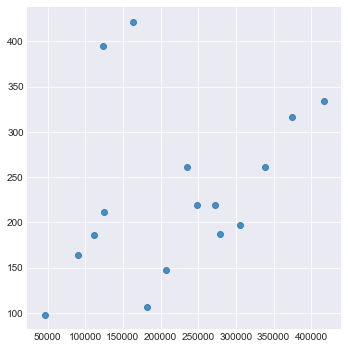

In [544]:
# 인구와 버스정류장 수의 상관관계
plt.figure()
sns.set_style('darkgrid')
sns.lmplot(x = '인구 (명)', y='COUNT', data=busan_data, size = 5)
plt.show()
# plt.figure( figsize = (6, 6))
# plt.scatter(np.array(busan_data['인구 (명)']), np.array(busan_data['COUNT']))
# plt.show()

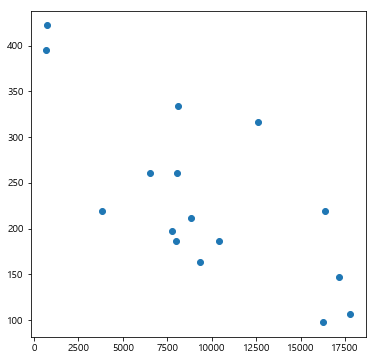

In [489]:
# 인구밀도와 버스정류장 수의 상관관계
# plt.figure()
# sns.set_style('darkgrid')
# sns.lmplot(x = '인구밀도 (명/㎢)', y='COUNT', data=busan_data, size = 5)
# plt.show()
plt.figure( figsize = (6, 6))
plt.scatter(np.array(busan_data['인구밀도 (명/㎢)']), np.array(busan_data['COUNT']))
plt.show()

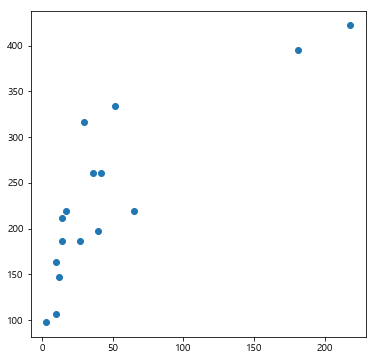

In [490]:
# 면적과 버스정류장 수의 상관관계
# plt.figure()
# sns.set_style('darkgrid')
# sns.lmplot(x = '면적 (㎢)', y='COUNT', data=busan_data, size = 5)
# plt.show()
plt.figure( figsize = (6, 6))
plt.scatter(np.array(busan_data['면적 (㎢)']), np.array(busan_data['COUNT']))
plt.show()

## 배차시간(1일 정류 횟수) 고려한 분석

In [491]:
# 부산시 시내버스 운행정보 서비스
bus_raw_data = pd.read_excel('./data/busan_bus_information.xlsx')
bus_raw_data.head()

,버스 번호,버스 종류,버스 회사명,기점명,종점명,첫차 시간,막차 시간,노선ID,배차간격,배차간격(일반),배차간격(출퇴근),배차간격(휴일)
0,1,일반버스,오성,민락동,부암역,05:05,22:40,5200001000,NaN,21,21,21
1,10,일반버스,국제,연제공용차고지,동명오거리,04:30,22:15,5200010000,7,9-10,8,10-12
2,100,일반버스,해동,청강리,장전역,04:50,21:50,5200100000,8,15,10,12
3,100-1,일반버스,해동,송정,부산대,05:00,22:10,5200100100,8,10,9,11
4,1000,급행버스,동원,다대포,서면,05:00,22:15,5201000000,10,13,10,14


In [492]:
len(bus_raw_data['버스 번호'])

285

In [493]:
# 마을버스 제외
bus_data = bus_raw_data[bus_raw_data['버스 종류'] != '마을버스']
len(bus_data), len(busanbuses)

(153, 153)

In [494]:
for bus in bus_data['버스 번호'].unique() :
    if bus not in busanbuses :
        print(bus)

In [495]:
for bus in busanbuses :
    if bus not in bus_data['버스 번호'].unique() :
        print(bus)

In [496]:
# 데이터 완전히 일치

In [497]:
bus_time_data = bus_data.iloc[:, [0, 5, 6, 8, 9, 10, 11]]

In [498]:
bus_time_data.head()

,버스 번호,첫차 시간,막차 시간,배차간격,배차간격(일반),배차간격(출퇴근),배차간격(휴일)
0,1,05:05,22:40,NaN,21,21,21
1,10,04:30,22:15,7,9-10,8,10-12
2,100,04:50,21:50,8,15,10,12
3,100-1,05:00,22:10,8,10,9,11
4,1000,05:00,22:15,10,13,10,14


In [499]:
# 배차간격을 대표할 데이터 정하기

In [500]:
bus_time_data[bus_time_data['배차간격'].isnull()].head()

,버스 번호,첫차 시간,막차 시간,배차간격,배차간격(일반),배차간격(출퇴근),배차간격(휴일)
0,1,05:05,22:40,NaN,21,21,21
15,1008,05:20,23:10,NaN,12,10,13
16,1009,05:20,20:50,NaN,40,40,40
18,1010,04:55,21:45,NaN,12,9,11
19,1011,05:00,21:00,NaN,25,10~15,25


In [501]:
bus_time_data[bus_time_data['배차간격(일반)'].isnull()]

,버스 번호,첫차 시간,막차 시간,배차간격,배차간격(일반),배차간격(출퇴근),배차간격(휴일)
117,555,06:20,17:20,NaN,NaN,10,NaN


In [502]:
bus_time_data[bus_time_data['배차간격(출퇴근)'].isnull()]

,버스 번호,첫차 시간,막차 시간,배차간격,배차간격(일반),배차간격(출퇴근),배차간격(휴일)


In [503]:
bus_time_data[bus_time_data['배차간격(휴일)'].isnull()]

,버스 번호,첫차 시간,막차 시간,배차간격,배차간격(일반),배차간격(출퇴근),배차간격(휴일)
117,555,06:20,17:20,NaN,NaN,10,NaN


In [504]:
# '배차간격(출퇴근)' 데이터에는 null이 없지만
# '배차간격(일반)' 데이터로 분석
# -> null값 채운다

In [505]:
# bus_time_data[bus_time_data['배차간격(일반)'].isnull()]['배차간격(일반)'] = 10
# 위 문장은 왜 안 되는가?
bus_time_data.loc[bus_time_data['배차간격(일반)'].isnull(), '배차간격(일반)'] = '10'

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [506]:
bus_time_data[bus_time_data['배차간격(일반)'].isnull()]

,버스 번호,첫차 시간,막차 시간,배차간격,배차간격(일반),배차간격(출퇴근),배차간격(휴일)


In [507]:
bus_time_data['첫차 시간'].unique()

array(['05:05', '04:30', '04:50', '05:00', '22:28', '22:20', '04:20',
       '22:30', '22:00', '06:00', '05:20', '04:45', '04:55', '04:40',
       '22:40', '05:30', '22:45', '05:10', '05:35', '04:35', '04:25',
       '06:20', '05:15', '04:56', '04:48', '04:46', '07:50'], dtype=object)

In [508]:
bus_time_data['막차 시간'].unique()

array(['22:40', '22:15', '21:50', '22:10', '23:55', '22:00', '23:00',
       '22:20', '23:45', '21:40', '23:40', '20:20', '22:05', '23:10',
       '20:50', '22:25', '21:45', '21:00', '22:30', '22:50', '22:19',
       '21:20', '22:35', '21:55', '22:56', '22:06', '22:55', '23:05',
       '23:35', '20:00', '22:45', '22:28', '23:52', '21:30', '17:20',
       '22:24', '22:37', '22:43', nan, '22:13', '22:53'], dtype=object)

In [509]:
# 막차 시간 nan값 처리 & 첫차 값 수정
bus_time_data[bus_time_data['막차 시간'].isnull()]

,버스 번호,첫차 시간,막차 시간,배차간격,배차간격(일반),배차간격(출퇴근),배차간격(휴일)
135,73(아침),05:00,NaN,NaN,60,60,60


In [510]:
# 73(아침) 실제 첫차 시간 07:00
# 73(아침) 실제 막차 시간 09:00
bus_time_data.loc[bus_time_data['막차 시간'].isnull(), '첫차 시간'] = '07:00'
bus_time_data.loc[bus_time_data['막차 시간'].isnull(), '막차 시간'] = '09:00'

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd f

In [511]:
bus_time_data[bus_time_data['버스 번호']=='73(아침)']

,버스 번호,첫차 시간,막차 시간,배차간격,배차간격(일반),배차간격(출퇴근),배차간격(휴일)
135,73(아침),07:00,09:00,NaN,60,60,60


In [512]:
bus_time_data = bus_time_data.iloc[:, [0, 1, 2, 4]]

In [513]:
bus_time_data.head()

,버스 번호,첫차 시간,막차 시간,배차간격(일반)
0,1,05:05,22:40,21
1,10,04:30,22:15,9-10
2,100,04:50,21:50,15
3,100-1,05:00,22:10,10
4,1000,05:00,22:15,13


In [514]:
# 정규표현식 사용해서 계산
import re

In [515]:
# 시간 → 분 변경 함수
p = re.compile('(\d+):(\d+)')
def changeToMin(x) :
    m = p.match(x)
    return int(m.groups()[0])*60+int(m.groups()[1])

In [516]:
bus_time_data['계산'] = bus_time_data['막차 시간'].apply( changeToMin ) - bus_time_data['첫차 시간'].apply( changeToMin )

In [517]:
bus_time_data.head()

,버스 번호,첫차 시간,막차 시간,배차간격(일반),계산
0,1,05:05,22:40,21,1055
1,10,04:30,22:15,9-10,1065
2,100,04:50,21:50,15,1020
3,100-1,05:00,22:10,10,1030
4,1000,05:00,22:15,13,1035


In [518]:
bus_time_data['배차간격(일반)'].unique()

array(['21', '9-10', '15', '10', '13', '9', '18', '11', '30', '32', '27',
       '12', '40', '8', '25', '14', '7', '20', '6~8', '23', '6', '12~13',
       '16', '22', '5', '5~6', '17', '45', '50', '10~12', '16~18',
       '11~12', '4~5', '52', '29', '19', '56', '21~24', '8~10', '24',
       '60', '6~7', '28'], dtype=object)

In [519]:
# '배차간격(일반)' 데이터
# 정규식으로 나눌 수 있는 숫자로 변환
p = re.compile('(\d+)\s*')

In [520]:
tmp = []
for minute in bus_time_data['배차간격(일반)'] :
    m = p.findall(minute)
    tmp.append(int(m[0]))

In [521]:
bus_time_data['배차간격_수정'] = tmp

In [522]:
bus_time_data.head()

,버스 번호,첫차 시간,막차 시간,배차간격(일반),계산,배차간격_수정
0,1,05:05,22:40,21,1055,21
1,10,04:30,22:15,9-10,1065,9
2,100,04:50,21:50,15,1020,15
3,100-1,05:00,22:10,10,1030,10
4,1000,05:00,22:15,13,1035,13


In [523]:
bus_time_data['1일 정류횟수'] = (bus_time_data['계산'] // bus_time_data['배차간격_수정']) +1

In [524]:
bus_time_data.head()

,버스 번호,첫차 시간,막차 시간,배차간격(일반),계산,배차간격_수정,1일 정류횟수
0,1,05:05,22:40,21,1055,21,51
1,10,04:30,22:15,9-10,1065,9,119
2,100,04:50,21:50,15,1020,15,69
3,100-1,05:00,22:10,10,1030,10,104
4,1000,05:00,22:15,13,1035,13,80


In [525]:
busstop_busan_oneday = busstop_busan[:]
busstop_busan_oneday.head()

,BUSLINENUM,NAME,SIGUNNAME,GUNAME,X,Y,BUSSTOPID
0,1,기점,부산광역시,수영구,129.127115,35.159515,21140601002
1,1,MBC방송국,부산광역시,수영구,129.126416,35.159658,21140601013
2,1,민락동골목시장,부산광역시,수영구,129.123045,35.158969,21140601006
3,1,광안농협앞,부산광역시,수영구,129.120022,35.157650,21140571002
4,1,광안리해수욕장,부산광역시,수영구,129.116613,35.155443,21140571001


In [526]:
bus_cnt_per_day = []
for busnum in busstop_busan['BUSLINENUM'] :
    bus_cnt_per_day.append(bus_time_data[bus_time_data['버스 번호'] == busnum]['1일 정류횟수'].values[0])

In [527]:
busstop_busan_oneday['COUNT'] =  bus_cnt_per_day

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [528]:
busstop_busan_oneday.head(10)

,BUSLINENUM,NAME,SIGUNNAME,GUNAME,X,Y,BUSSTOPID,COUNT
0,1,기점,부산광역시,수영구,129.127115,35.159515,21140601002,51
1,1,MBC방송국,부산광역시,수영구,129.126416,35.159658,21140601013,51
2,1,민락동골목시장,부산광역시,수영구,129.123045,35.158969,21140601006,51
3,1,광안농협앞,부산광역시,수영구,129.120022,35.157650,21140571002,51
4,1,광안리해수욕장,부산광역시,수영구,129.116613,35.155443,21140571001,51
5,1,광안리입구,부산광역시,수영구,129.114244,35.156937,21140571008,51
6,1,광안역,부산광역시,수영구,129.113388,35.158245,21140571010,51
7,1,수영역,부산광역시,수영구,129.114436,35.163282,21140561008,51
8,1,수영사적공원,부산광역시,수영구,129.113046,35.168964,21140531010,51
9,1,수영아파트,부산광역시,수영구,129.110794,35.170500,21140531012,51


In [529]:
busstop_busan_oneday = busstop_busan_oneday.iloc[:, -2:]
busstop_busan_oneday.head()

,BUSSTOPID,COUNT
0,21140601002,51
1,21140601013,51
2,21140601006,51
3,21140571002,51
4,21140571001,51


In [530]:
busstop_busan_oneday = pd.pivot_table(busstop_busan_oneday, index = 'BUSSTOPID', values = 'COUNT', aggfunc = [np.sum])

In [531]:
busstop_busan_oneday = pd.DataFrame(busstop_busan_oneday.values, index = busstop_busan_oneday.index)
busstop_busan_oneday = busstop_busan_oneday.rename(columns={
    0 : 'COUNT'
})
busstop_busan_oneday.head()

,COUNT
BUSSTOPID,
21010511001,467
21010511003,508
21010511004,2009
21010511005,81
21010511006,81


In [532]:
# 각 id에 해당하는 버스정류장, 위도, 경도, 자치구 찾기
names = []
ys = []
xs = []
gus = []
for id in busstop_busan_oneday.index :
    names.append(busstop_busan[ busstop_busan['BUSSTOPID']==id ]['NAME'].values[0])
    ys.append(busstop_busan[ busstop_busan['BUSSTOPID']==id ]['Y'].values[0])
    xs.append(busstop_busan[ busstop_busan['BUSSTOPID']==id ]['X'].values[0])
    gus.append(busstop_busan[ busstop_busan['BUSSTOPID']==id ]['GUNAME'].values[0])

In [533]:
busstop_busan_oneday['NAME'] = names
busstop_busan_oneday['Y'] = ys
busstop_busan_oneday['X'] = xs
busstop_busan_oneday['GUNAME'] = gus

In [534]:
busstop_busan_oneday.head()

,COUNT,NAME,Y,X,GUNAME
BUSSTOPID,,,,,
21010511001,467,제일은행앞,35.103002,129.034916,중구
21010511003,508,중부경찰서,35.107619,129.036175,중구
21010511004,2009,영주동,35.109653,129.037496,중구
21010511005,81,2부두,35.108471,129.040106,중구
21010511006,81,2부두,35.108364,129.040671,중구


In [535]:
sorted_busstop_busan_oneday = busstop_busan_oneday.sort_values(by='COUNT', ascending=False)

In [536]:
sorted_busstop_busan_oneday.head(20)

,COUNT,NAME,Y,X,GUNAME
BUSSTOPID,,,,,
21050531008,2534,송상현광장,35.166863,129.065650,부산진구
21010511021,2102,중앙동(중앙역),35.106675,129.036341,중구
21010511015,2085,중앙동(중앙역),35.105433,129.036025,중구
21010511004,2009,영주동,35.109653,129.037496,중구
21050521024,1983,롯데호텔백화점(서면역),35.157375,129.056778,부산진구
50000002293,1973,동래시장,35.201016,129.088032,동래구
50000002294,1973,동래시장,35.201035,129.087176,동래구
21050711001,1924,가야시장(가야역),35.155910,129.044520,부산진구
21050711004,1924,가야시장(가야역),35.156237,129.043532,부산진구


In [537]:
sorted_busstop_busan_oneday.tail(20)

,COUNT,NAME,Y,X,GUNAME
BUSSTOPID,,,,,
21310321016,21,기장실버홈,35.314141,129.169947,기장군
50000000744,21,에스아이시스템,35.377056,129.256313,기장군
50000000492,21,연꽃공원앞,35.295744,129.170136,기장군
21310331041,21,구림마을,35.272205,129.157703,기장군
21310331042,21,구림마을,35.272057,129.157649,기장군
21310321015,21,형제복지지원재단,35.306610,129.172391,기장군
21120561111,19,가동마을입구,35.165314,128.885053,강서구
21120561113,19,녹산동행정복지센터,35.154740,128.884338,강서구
21120561116,19,녹산동행정복지센터,35.154367,128.883444,강서구


### → 배차시간 고려 후에도, '송상현광장'의 1일 정류횟수가 가장 많다

###### 지도에 시각화

In [546]:
gps = [ 35.1564294,129.0603389 ]
map_busan_bs_oneday = folium.Map(location = gps, zoom_start=11)
for id in sorted_busstop_busan_oneday.index[:20] :
    folium.Marker([sorted_busstop_busan_oneday['Y'][id], sorted_busstop_busan_oneday['X'][id]],
                 icon = folium.Icon(icon = 'info-sign', 
                                    color = 'red')).add_to(map_busan_bs_oneday)
for id in sorted_busstop_busan_oneday.index[-20:] :
    folium.Marker([sorted_busstop_busan_oneday['Y'][id], sorted_busstop_busan_oneday['X'][id]],
                 icon = folium.Icon(icon = 'info-sign', 
                                    color = 'blue')).add_to(map_busan_bs_oneday)
map_busan_bs_oneday